# Graph Matrix

This notebook demonstrates different matrix representations for an undirected graph $G$

## Packages

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

## User parameters

In [2]:
NUM_NODES = 8
PROBABILITY = 0.3 # Probability for edge creation

## Generate a graph

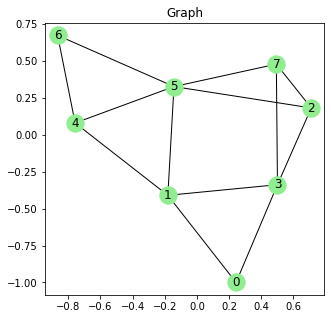

In [3]:
np.random.seed(5)
G = nx.generators.erdos_renyi_graph(NUM_NODES, PROBABILITY, seed=np.random)

fig, ax = plt.subplots(figsize=(5, 5))
plt.title('Graph')
nx.draw(G, node_color='lightgreen', with_labels = True,ax=ax)

ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

## Graph Matrices

Matrices are used to describe graphs and operations.
- Adjacency matrix
- Degree matrix
- Laplacian matrix
- Incidence matrix

#### Adjacency matrix

The adjacency matrix $A$ of a graph $G$ with $n$ nodes is a matrix $(v_{ij}) \in \mathbb{R}^{n \times n}$ where :
- $(v_{i}, v_{j}) = 0$ when the vertex $v_{i}$ and $v_{j}$ are adjacent
- $(v_{i}, v_{j}) =1$ when the vertex $v_{i}$ and $v_{j}$ are not adjacent

In [4]:
A = nx.linalg.graphmatrix.adjacency_matrix(G).todense()
print(A)

[[0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0.]]


#### Degree matrix

The degree matrix $D$ of a graph $G$ with $n$ nodes is a diagonal matrix where each entries is the degree of each vertex (the number of edges attached to each vertex).

In [5]:
degree_per_vertex = [v for deg, v in G.degree()]
D = np.diagflat(degree_per_vertex)
print(D)

[[2 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 3]]


#### Laplacian matrix

The laplacian matrix $L$ is the defined as $L=D-A$

In [6]:
L = nx.linalg.laplacianmatrix.laplacian_matrix(G).todense()
L = D - A
print(L)

[[ 2. -1.  0. -1.  0.  0.  0.  0.]
 [-1.  4.  0. -1. -1. -1.  0.  0.]
 [ 0.  0.  3. -1.  0. -1.  0. -1.]
 [-1. -1. -1.  4.  0.  0.  0. -1.]
 [ 0. -1.  0.  0.  3. -1. -1.  0.]
 [ 0. -1. -1.  0. -1.  5. -1. -1.]
 [ 0.  0.  0.  0. -1. -1.  2.  0.]
 [ 0.  0. -1. -1.  0. -1.  0.  3.]]


#### Incidence matrix

In [7]:
incidence_matrix = nx.linalg.graphmatrix.incidence_matrix(G).todense()
print(incidence_matrix)

[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.]]


## Property

#### Powers of adjacency matrix

The entry (i, j) of the adjacency matrix to the power of $s$ ($A^{s}$) gives the number of walks from $i$ to $j$ of length $s$.

In [8]:
s = 3
A_power = np.linalg.matrix_power(A, s)
pair_to_test = [(1,1),(5,1),(7,5),(7,3)]
print(A_power)

for p in pair_to_test:
    print('there are {} possible walks between vertex{} and vertex{}'.format(A_power[p[0],p[1]], p[0], p[1]))

[[ 2.  5.  3.  5.  2.  4.  2.  3.]
 [ 5.  4.  4.  9.  7. 11.  2.  4.]
 [ 3.  4.  4.  8.  4.  9.  2.  5.]
 [ 5.  9.  8.  4.  4.  4.  4.  8.]
 [ 2.  7.  4.  4.  4.  7.  5.  4.]
 [ 4. 11.  9.  4.  7.  6.  7.  9.]
 [ 2.  2.  2.  4.  5.  7.  2.  2.]
 [ 3.  4.  5.  8.  4.  9.  2.  4.]]
there are 4.0 possible walks between vertex1 and vertex1
there are 11.0 possible walks between vertex5 and vertex1
there are 9.0 possible walks between vertex7 and vertex5
there are 8.0 possible walks between vertex7 and vertex3


### References

[1] Van Mieghem, Piet. "Graph eigenvectors, fundamental weights and centrality metrics for nodes in networks." arXiv preprint arXiv:1401.4580 (2014).
[2] Page, Lawrence, Sergey Brin, Rajeev Motwani, and Terry Winograd. The PageRank citation ranking: Bringing order to the web. Stanford InfoLab, 1999.
[3] Online Class https://www.youtube.com/watch?v=R30qNytFJUg